In [1]:
%run '/content/drive/My Drive/Colab Notebooks/Methods.ipynb'

Streaming output truncated to the last 5000 lines.
  inflating: keras_png_slices_data/keras_png_slices_train/case_269_slice_5.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_269_slice_6.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_269_slice_7.nii.png  
 extracting: keras_png_slices_data/keras_png_slices_train/case_269_slice_8.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_269_slice_9.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_270_slice_0.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_270_slice_1.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_270_slice_10.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_270_slice_11.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_270_slice_12.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_270_slice_13.nii.png  
  inflatin

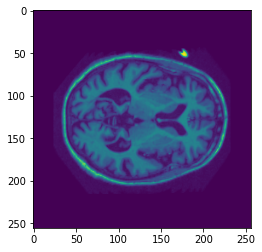

train_X shape: (1120, 256, 256)


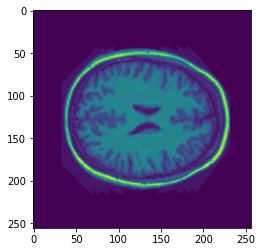

train_X shape: (544, 256, 256)


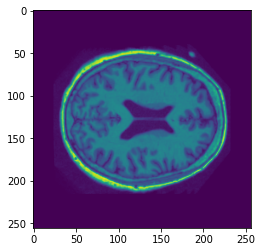

In [2]:
%run '/content/drive/My Drive/Colab Notebooks/Methods.ipynb'

# test script load and preprocess training images

# download oasis data and unzip files 
download_oasis()

# load training data set  
train_X = load_training ('/content/keras_png_slices_data/keras_png_slices_train')

# check loaded image
pyplot.imshow(train_X[2])
pyplot.show()

# pre- process training dataset 
train_X = process_training(train_X)

# load validaton data set and process it 
validate_X = load_training ('/content/keras_png_slices_data/keras_png_slices_validate')

# check loaded images
pyplot.imshow(validate_X[2])
pyplot.show()

# pre process validation data set
validate_X = process_training(validate_X)


# load test data set and process it 
test_X = load_training ('/content/keras_png_slices_data/keras_png_slices_test')

# check loaded images
pyplot.imshow(test_X[2])
pyplot.show()

# pre process test data set
test_X = process_training(test_X)

train_y shape: (9664, 256, 256)


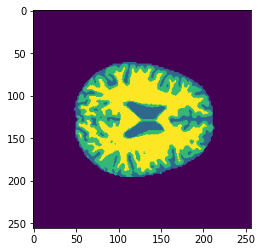

uint8
(9664, 256, 256, 4)


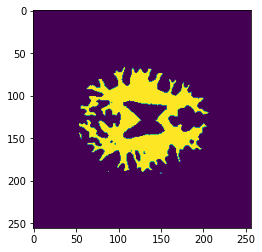

train_y shape: (1120, 256, 256)


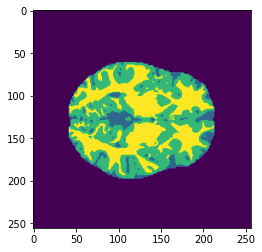

uint8
(1120, 256, 256, 4)


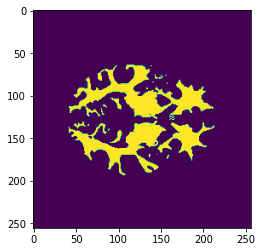

train_y shape: (544, 256, 256)


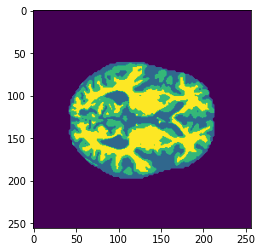

uint8
(544, 256, 256, 4)


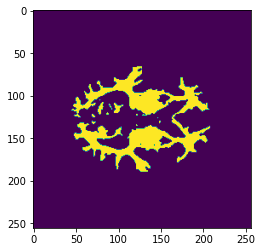

In [3]:

# load and pre process segmented training set 
train_Y = load_labels('/content/keras_png_slices_data/keras_png_slices_seg_train')
train_Y = process_labels(train_Y)

# check loaded images
pyplot.imshow(train_Y[2,:,:,3])
pyplot.show()


# load and pre process segmented validation set 
validate_Y = load_labels('/content/keras_png_slices_data/keras_png_slices_seg_validate')
validate_Y = process_labels(validate_Y)
 
# check loaded images
pyplot.imshow(validate_Y[2,:,:,3])
pyplot.show()

# load and pre process segmented test set 
test_Y = load_labels('/content/keras_png_slices_data/keras_png_slices_seg_test')
test_Y = process_labels(test_Y)
 
# check loaded images
pyplot.imshow(test_Y[2,:,:,3])
pyplot.show()

In [4]:

# create model ,set training paramters , train the model

# create a model instance and set training paramters 

model = unet_model()
opt= tf.keras.optimizers.Adam (learning_rate=.0005)
model.compile (optimizer=opt, loss= 'CategoricalCrossentropy' , metrics=[dice_coefficient])

# set early stop criteria 
#ES = tf.keras.callbacks.EarlyStopping( monitor='val_dice_coefficient',min_delta=.0001, patience=100, verbose=0, mode='max', restore_best_weights=True)

# record history of training to display loss over ephocs 
history = model.fit(train_X, train_Y,  validation_data= (validate_X, validate_Y) ,batch_size=32,shuffle='True',epochs=200)

# evaluate against testing data 
model.evaluate(test_X,test_Y)

# save trained model weights 
model.save_weights('/content/drive/My Drive/modelweights/unet8')


# plot training and validation loss 
pyplot.title('Dice Similarity Coefficient')
pyplot.plot(history.history['dice_coefficient'], color='blue', label='train')
pyplot.plot(history.history['val_dice_coefficient'], color='orange', label='test')
pyplot.legend(('training','validation'))

conv4 (None, 32, 32, 128)
upsample 1 (None, 32, 32, 128)
Epoch 1/200
302/302 [==============================] - 57s 189ms/step - loss: 0.4356 - dice_coefficient: 0.4744 - val_loss: 0.3251 - val_dice_coefficient: 0.5224
Epoch 2/200
302/302 [==============================] - 57s 187ms/step - loss: 0.2754 - dice_coefficient: 0.5611 - val_loss: 0.2666 - val_dice_coefficient: 0.5705
Epoch 3/200
302/302 [==============================] - 57s 188ms/step - loss: 0.2633 - dice_coefficient: 0.5741 - val_loss: 0.2589 - val_dice_coefficient: 0.5791
Epoch 4/200
302/302 [==============================] - 57s 188ms/step - loss: 0.2586 - dice_coefficient: 0.5795 - val_loss: 0.2559 - val_dice_coefficient: 0.5786
Epoch 5/200
302/302 [==============================] - 57s 188ms/step - loss: 0.2562 - dice_coefficient: 0.5825 - val_loss: 0.2534 - val_dice_coefficient: 0.5836
Epoch 6/200
302/302 [==============================] - 57s 188ms/step - loss: 0.2549 - dice_coefficient: 0.5841 - val_loss: 0.2528 - 

prediction


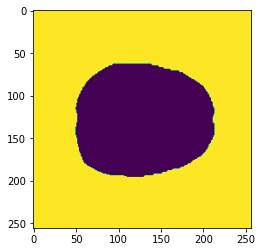

ground truth


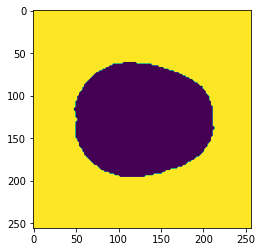

prediction


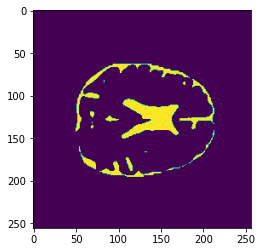

ground truth


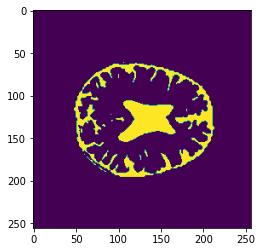

prediction


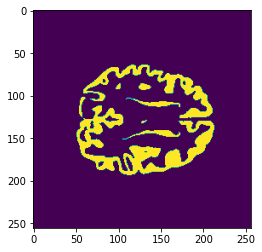

ground truth


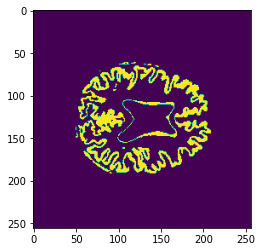

prediction


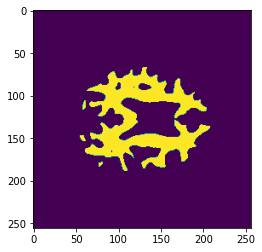

ground truth


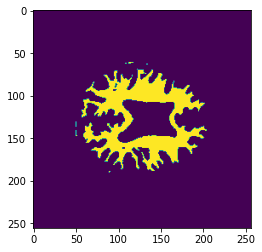

prediction


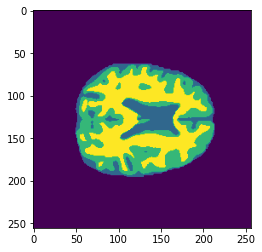

ground truth


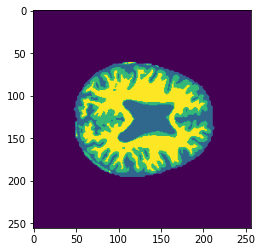

tf.Tensor(0.62088764, shape=(), dtype=float32)


In [18]:
# validate output 
out = model.predict(test_X)
out_r = np.round(out)
out_argmax = np.argmax (out,-1)
gt_test_Y = np.argmax(test_Y,-1)

im = 5

for i in range (4):
  print("prediction")
  pyplot.imshow(out_r[im,:,:,i])
  pyplot.show()
  print("ground truth")
  pyplot.imshow(test_Y[im,:,:,i])
  pyplot.show()

print ("prediction")
pyplot.imshow(out_argmax[im,:,:])
pyplot.show()

print ("ground truth")
pyplot.imshow(gt_test_Y [im,:,:])
pyplot.show()

# calculate Dice Similarity coefficient on test data set
gt = tf.convert_to_tensor(test_Y,dtype=tf.float32)
print (dice_coefficient(gt,out_r))

In [14]:
from keras import backend as k

def dice_coef(y_true, y_pred, smooth=1):
    
    
    y_true_f = k.flatten(y_true)
    y_pred_f = k.flatten(y_pred) 
    
    intersection1 = k.sum(y_true_f*y_pred_f)
    coeff = (2.0*intersection1)/(k.sum(k.square(y_true_f)) + k.sum(k.square(y_pred_f)) )

   
    return coeff

In [17]:
gt = tf.convert_to_tensor(test_Y,dtype=tf.float32)
print (dice_coef(gt,out))

tf.Tensor(0.89720505, shape=(), dtype=float32)


In [ ]:
'''
# load saved model and evaluate results
loaded_model = unet_model()
opt= tf.keras.optimizers.Adam (learning_rate=.0005)
loaded_model.compile (optimizer=opt, loss= 'CategoricalCrossentropy' , metrics=['accuracy'])
loaded_model.load_weights('/content/drive/My Drive/modelweights/unet8')
loaded_model.evaluate (test_X,test_Y)

In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 256, 256, 16) 160         input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_26 (LeakyReLU)      (None, 256, 256, 16) 0           conv2d_30[0][0]                  
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 256, 256, 16) 64          leaky_re_lu_26[0][0]             
_______________________________________________________________________________________

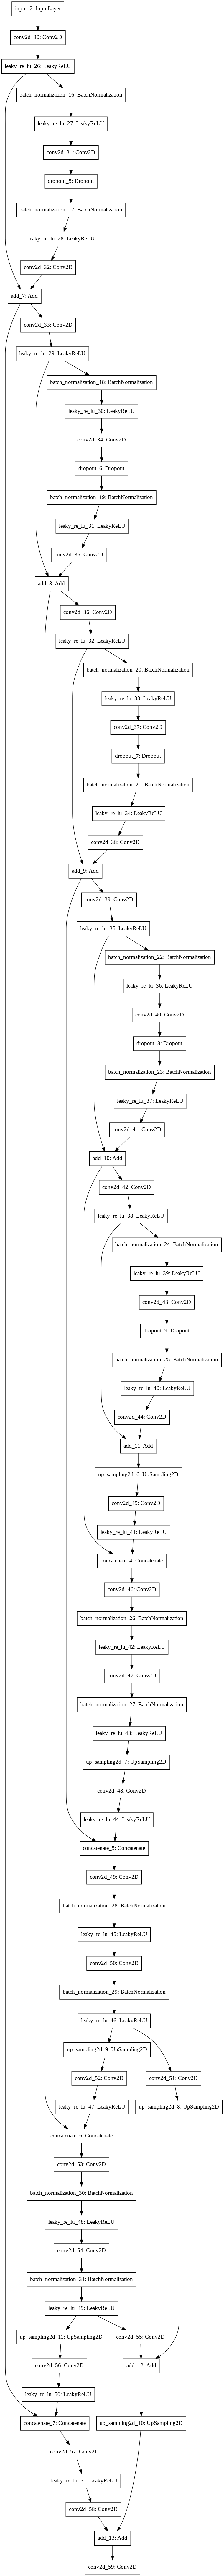

In [ ]:
tf.keras.utils.plot_model(model)